## Clustering Assignment

### Problem Statement

 HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 
And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Reading and Understanding the data

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.decomposition import PCA

In [58]:
country_data = pd.read_csv("Country-data.csv")

In [59]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [60]:
country_data.shape

(167, 10)

In [61]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [62]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [63]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [64]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Visualization

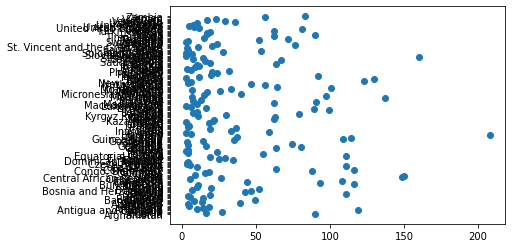

In [65]:
plt.scatter(country_data.child_mort, country_data.country)
plt.show()

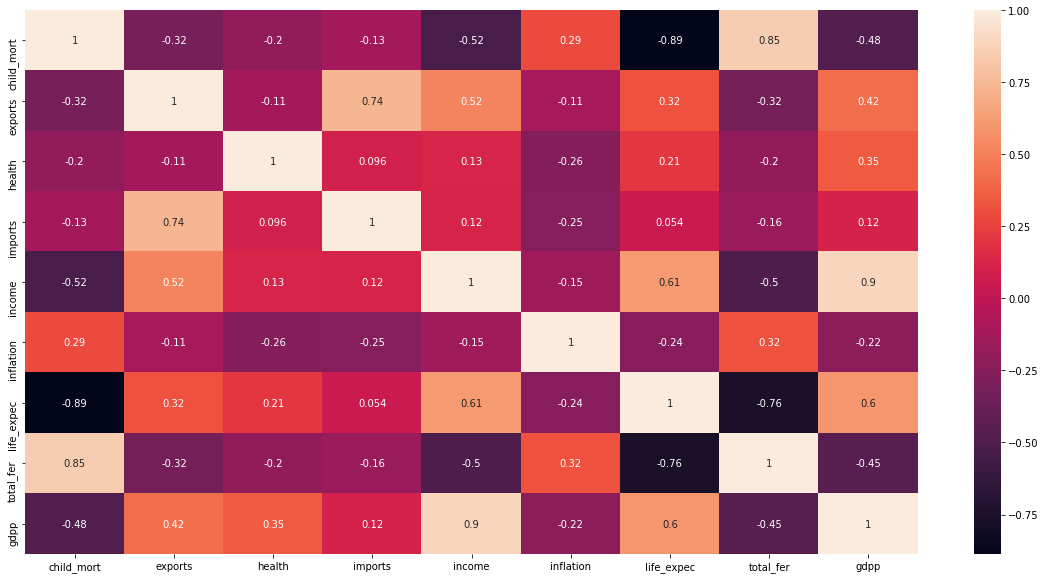

In [66]:
plt.figure(figsize = (20,10))        
sns.heatmap(country_data.corr(),annot = True)
plt.show()

In [67]:
a = max(country_data.corr())
a

'total_fer'

In [68]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Preparation for modelling

#### Converting all the percentage columns to actual values (Exports,Imports,Health) so as to make them equivalant to GDP values.

In [69]:
country_data.exports = country_data.exports * country_data.gdpp / 100

In [70]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Similarly convert remaining

In [71]:
country_data.imports = country_data.imports * country_data.gdpp / 100
country_data.health = country_data.health * country_data.gdpp / 100

In [72]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### For our understanding lets change the names of columns

In [73]:
country_data.columns = ['Country', 'Child_Mortuary', 'Exports', 'Health', 'Imports', 'Income', 'Inflation', 'Life_expectancy', 'Total_Fertility', 'GDP']
country_data.head()

,Country,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Checking for outliers

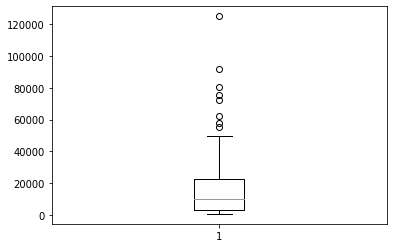

In [74]:
plt.boxplot(country_data.Income)
plt.show()

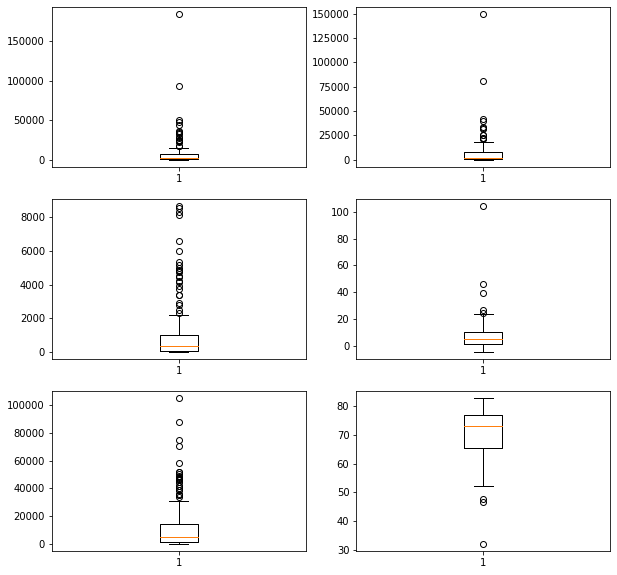

In [75]:
plt.figure(figsize=(10, 10))
plt.subplot(3,2,1)
plt.boxplot(country_data.Exports)
plt.subplot(3,2,2)
plt.boxplot(country_data.Imports)
plt.subplot(3,2,3)
plt.boxplot(country_data.Health)
plt.subplot(3,2,4)
plt.boxplot(country_data.Inflation)
plt.subplot(3,2,5)
plt.boxplot(country_data.GDP)
plt.subplot(3,2,6)
plt.boxplot(country_data.Life_expectancy)
plt.show()

#### We see that the variables Exports, Imports, Inflation and GDP have high rate of outliers. The thing here is to whether we remove these outliers or not. If we remove them we may miss some of the country data.

#### So let us handle them.

#### We have one category value of countries we can either remove those values or make them as index.

In [76]:
country_data.set_index('Country',inplace = True)
country_data.head()

,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP
Country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [77]:
country_data.describe()

,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [78]:
country_data.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


#### As you can see the difference between the values above 99th percentile are higher compared to the difference or range between remaining percentile.

#### Statistical Outlier Analysis
#### As in statistical outlier analysis we consider the values which are above the threshold value 0.95 as outliers.

In [79]:
Q1 = country_data.GDP.quantile(0.05)
Q3 = country_data.GDP.quantile(0.95)
IQR = Q3-Q1
country_data1 = country_data[(country_data.GDP < Q3)]

In [80]:
country_data1.describe()

,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,4930.901567,781.770539,4672.041152,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,9588.714789,1316.883524,8370.829584,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,10.300000,428.284500,67.989000,536.700000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,1634.595000,273.188000,1823.400000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,5629.750000,812.497500,5872.430000,20100.000000,11.175000,76.400000,4.200000,12075.000000
max,208.000000,93200.000000,8663.600000,81084.000000,80600.000000,104.000000,82.800000,7.490000,48400.000000


In [81]:
country_data1.shape

(158, 9)

#### Scaling

In [82]:
scaler = StandardScaler()
country_data_scaled = scaler.fit_transform(country_data1)
country_data_scaled.shape

(158, 9)

#### As it gives an numpy array we convert it into a dataframe.

In [83]:
country_data_scaled = pd.DataFrame(country_data_scaled)
country_data_scaled.columns = ["Child_Mortuary", "Exports", "Health", "Imports", "Income", "Inflation", "Life_expectancy", "Total_Fertility", "GDP"]
country_data_scaled.head()

,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP
0,1.234847,-0.510090,-0.563608,-0.530152,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.396063,-0.391462,-0.321693,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.336697,-0.453862,-0.392076,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,-0.285794,-0.518900,-0.378423,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.064875,-0.035126,0.301255,0.295540,-0.620888,0.780774,-0.575585,0.180376


#### Now lets use PCA (Principle components anaysis) to categorize the variables into some clusters and then we use K-Means clustering for records clustering.

#### PCA (Principle components anaysis)

In [84]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(country_data_scaled)

PCA(random_state=42, svd_solver='randomized')

In [85]:
pca.components_

array([[-0.32797786,  0.33916924,  0.3336202 ,  0.34538444,  0.38579085,
        -0.13597407,  0.35109525, -0.31811331,  0.39371871],
       [ 0.47332822,  0.41143247,  0.1149049 ,  0.37103347,  0.185648  ,
         0.2468052 , -0.35343546,  0.44453974,  0.19469097],
       [-0.16799894, -0.0336416 , -0.09978455, -0.09570696,  0.13329091,
         0.93884331,  0.21000085, -0.09029083, -0.0090445 ],
       [-0.13532508,  0.42831943, -0.67584401,  0.40503999, -0.07365024,
        -0.05425296,  0.02206267, -0.17453626, -0.37160417],
       [ 0.18646267, -0.04389298, -0.07038176, -0.14705219,  0.32652689,
         0.03322894, -0.60336184, -0.67898515,  0.06274414],
       [-0.03453879, -0.04137691, -0.43297879, -0.35574866,  0.71039227,
        -0.18430795,  0.12398613,  0.34636636,  0.09538587],
       [-0.76494723,  0.01724219,  0.08188234,  0.02627288, -0.00423393,
         0.03074221, -0.57126548,  0.28247752,  0.00791528],
       [ 0.01965354,  0.12132096,  0.45286284, -0.03635159,  0

In [86]:
pca.explained_variance_ratio_

array([0.59447198, 0.16160401, 0.10121329, 0.08061451, 0.02641285,
       0.0232014 , 0.0097043 , 0.0021116 , 0.00066606])

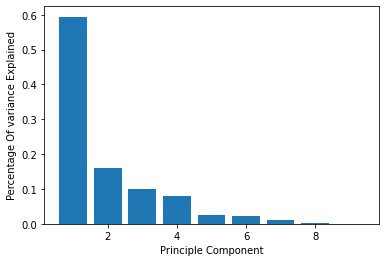

In [87]:
plt.bar(x=range(1,len(pca.explained_variance_ratio_)+1), height = pca.explained_variance_ratio_)
plt.xlabel("Principle Component")
plt.ylabel("Percentage Of variance Explained")
plt.show()

#### From the above barplot we can say that about 90 percent of variance in th data can be explained by the first three principle components.

#### As we know we need to check the Scree-Plot for the cummulative variance in the data.

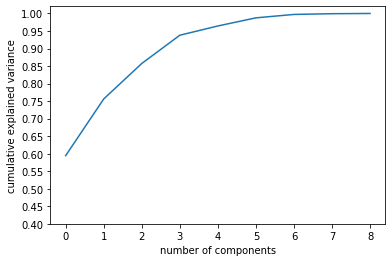

In [88]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0.4,1.05,0.05))
plt.show()

#### From the above variance factor we can say around 95% of variance can be explianed by 4 principle components.

#### For our instance let us view the data of principle components values in dataframe.

In [89]:
index = country_data.columns
pca_data = pd.DataFrame({"Feature" : index, "PC_1" : pca.components_[0], "PC_2" : pca.components_[1], "PC_3" : pca.components_[2], "PC_4" : pca.components_[3]})
pca_data

,Feature,PC_1,PC_2,PC_3,PC_4
0,Child_Mortuary,-0.327978,0.473328,-0.167999,-0.135325
1,Exports,0.339169,0.411432,-0.033642,0.428319
2,Health,0.333620,0.114905,-0.099785,-0.675844
3,Imports,0.345384,0.371033,-0.095707,0.405040
4,Income,0.385791,0.185648,0.133291,-0.073650
5,Inflation,-0.135974,0.246805,0.938843,-0.054253
6,Life_expectancy,0.351095,-0.353435,0.210001,0.022063
7,Total_Fertility,-0.318113,0.444540,-0.090291,-0.174536
8,GDP,0.393719,0.194691,-0.009044,-0.371604


#### The above is the dataframe for principle component values of all features.

#### From the above we can see that some of the elements can be explained from PC_1 and PC_2.

c:\users\t e j\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


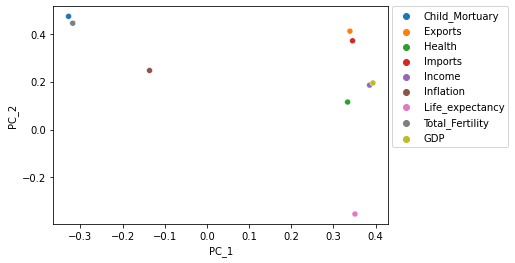

In [90]:
sns.scatterplot(pca_data.PC_1, pca_data.PC_2, hue = pca_data.Feature)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

c:\users\t e j\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


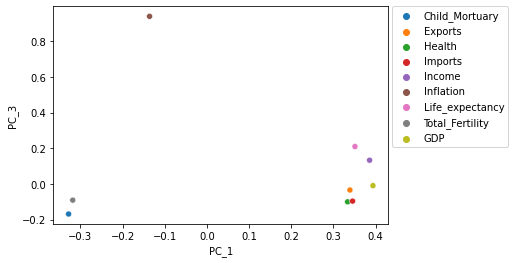

In [91]:
sns.scatterplot(pca_data.PC_1, pca_data.PC_3, hue = pca_data.Feature)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

#### Lets import IncrementalPCA for optimal principle components

In [92]:
from sklearn.decomposition import IncrementalPCA

In [93]:
final_pca = IncrementalPCA(n_components=4)

In [94]:
final_data = final_pca.fit_transform(country_data_scaled)
final_data.shape

(158, 4)

In [95]:
final_data

array([[-2.72530773e+00,  1.21768403e+00, -5.62977360e-01,
         2.22393251e-01],
       [ 9.81178011e-02, -1.49268054e+00,  6.90443098e-02,
        -3.96310881e-01],
       [-3.23742841e-01, -7.11889357e-01,  1.01964291e+00,
        -1.31493728e-01],
       [-2.69205854e+00,  2.04886742e+00,  5.30635435e-01,
         4.18258657e-01],
       [ 1.08288766e+00, -8.16007367e-01, -2.11525984e-01,
        -3.18527758e-01],
       [ 3.12250459e-01, -6.26229614e-01,  1.47261527e+00,
         2.97876643e-01],
       [-2.64147254e-01, -1.37631502e+00,  2.56386416e-01,
        -4.23086561e-01],
       [ 5.53370312e+00,  1.47225718e+00, -5.93973890e-01,
         1.34671482e+00],
       [-2.80073649e-01, -4.77320742e-01,  6.31186592e-01,
        -1.99658447e-01],
       [ 2.33591262e+00,  6.63668625e-02, -6.58054606e-01,
         4.14138597e-01],
       [ 2.33209168e+00,  3.03029184e-01,  4.14346587e-01,
        -3.75511211e-01],
       [-1.04639623e+00, -9.00108289e-01, -5.06646419e-02,
      

<AxesSubplot:>

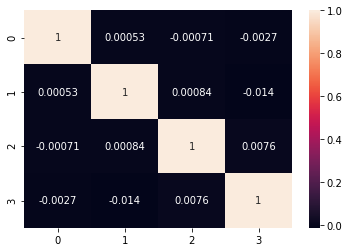

In [96]:
final_data_corr = np.corrcoef(final_data.transpose())
sns.heatmap(final_data_corr, annot = True)

#### From the above heatmap we can see all the values of correlations are very close to zero. So we can consider these principle components.

In [97]:
pcs = np.transpose(final_data)

In [98]:
index = country_data.columns
final_dataset = pd.DataFrame({'PC1':pcs[0],'PC2':pcs[1], 'PC3':pcs[2], 'PC4':pcs[3]})
final_dataset

,PC1,PC2,PC3,PC4
0,-2.725308,1.217684,-0.562977,0.222393
1,0.098118,-1.492681,0.069044,-0.396311
2,-0.323743,-0.711889,1.019643,-0.131494
3,-2.692059,2.048867,0.530635,0.418259
4,1.082888,-0.816007,-0.211526,-0.318528
...,...,...,...,...
153,-1.149064,-0.432753,-0.624881,-0.266851
154,0.035577,0.141584,3.589390,0.382931
155,-0.559223,-1.201465,0.582019,-0.422954
156,-1.813438,0.421889,1.176228,0.143081


### Now lets go with K-Means 

#### First let us find the optimal number of clusters for the obtanied data set

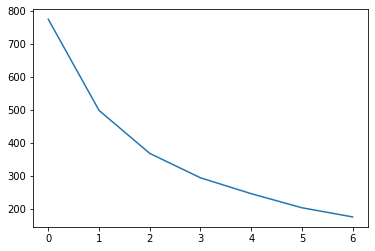

In [99]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(final_dataset)
    
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

#### from the above curve we can say that the elbow at point 1 has a sharp change of slope which is K = 3.

#### So we can consider K = 3 as an initial nummber of clusters for K- Means.

#### There is also another way of determining the number of clusters which is "Silhouette Analysis". Let us also used that and find the number of clusters.

In [100]:
range_n_clusters = [2,3,4,5,6,7]
for cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=50)
    kmeans.fit(final_dataset)
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(final_dataset, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5026786646220651
For n_clusters=3, the silhouette score is 0.46012300750045454
For n_clusters=4, the silhouette score is 0.46806816657959194
For n_clusters=5, the silhouette score is 0.4727963763603528
For n_clusters=6, the silhouette score is 0.39991029385094656
For n_clusters=7, the silhouette score is 0.3625594438405727


#### From the above Silhouette Analysis we can see the drop of percentage from n = 2 to n = 3 is high compared to n = 3 to n = 4 so it is optimal if we take 3 clusters initially.

#### Model with K = 3

In [101]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(final_dataset)

KMeans(max_iter=50, n_clusters=3)

In [102]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0,
       1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0,
       0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 2])

In [103]:
final_dataset["Cluster_ID"] = kmeans.labels_
final_dataset.head()

,PC1,PC2,PC3,PC4,Cluster_ID
0,-2.725308,1.217684,-0.562977,0.222393,2
1,0.098118,-1.492681,0.069044,-0.396311,0
2,-0.323743,-0.711889,1.019643,-0.131494,0
3,-2.692059,2.048867,0.530635,0.418259,2
4,1.082888,-0.816007,-0.211526,-0.318528,0


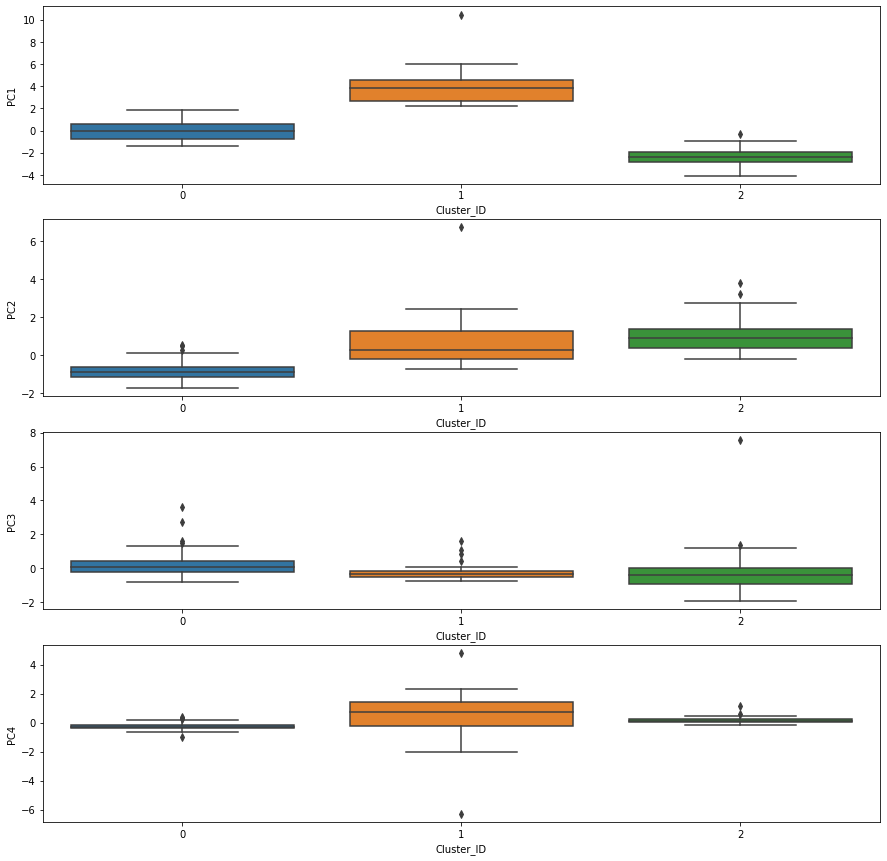

In [104]:
plt.figure(figsize=(15, 15))
plt.subplot(4,1,1)
sns.boxplot(x='Cluster_ID', y='PC1', data=final_dataset)
plt.subplot(4,1,2)
sns.boxplot(x='Cluster_ID', y='PC2', data=final_dataset)
plt.subplot(4,1,3)
sns.boxplot(x='Cluster_ID', y='PC3', data=final_dataset)
plt.subplot(4,1,4)
sns.boxplot(x='Cluster_ID', y='PC4', data=final_dataset)
plt.show()


In [105]:
final_dataset['Cluster_ID'].value_counts()

0    83
2    47
1    28
Name: Cluster_ID, dtype: int64

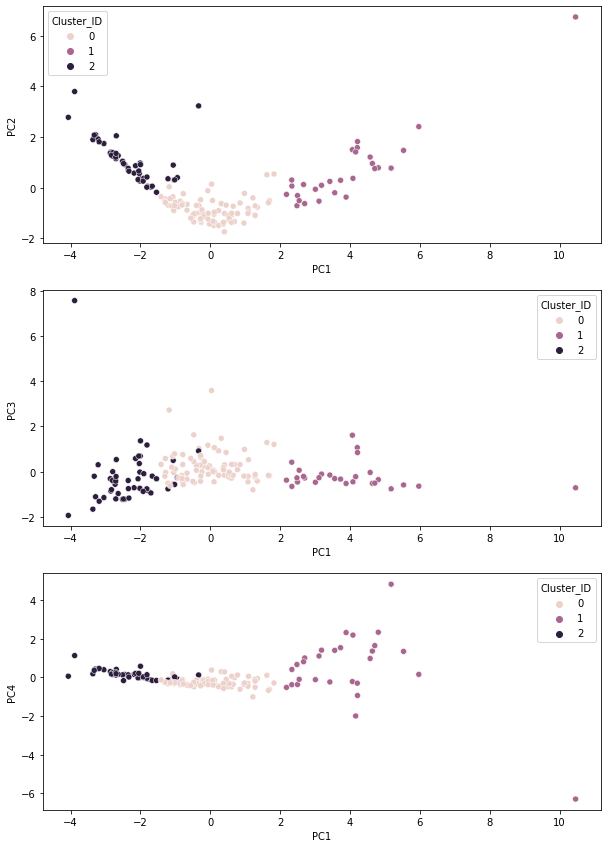

In [106]:
plt.figure(figsize=(10, 20))
plt.subplot(4,1,1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster_ID", data=final_dataset)
plt.subplot(4,1,2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster_ID", data=final_dataset)
plt.subplot(4,1,3)
sns.scatterplot(x="PC1", y="PC4", hue="Cluster_ID", data=final_dataset)
plt.show()



#### In the above plots we can say that the points in each of the dataframe satisfies the intra cluster homogeniety considerations as there is no high distances between the points in the plots.

In [107]:
total_data = pd.merge(country_data.reset_index(), final_dataset, left_index = True, right_index = True)
total_data.head()

,Country,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP,PC1,PC2,PC3,PC4,Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.725308,1.217684,-0.562977,0.222393,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0.098118,-1.492681,0.069044,-0.396311,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.323743,-0.711889,1.019643,-0.131494,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.692059,2.048867,0.530635,0.418259,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.082888,-0.816007,-0.211526,-0.318528,0


#### Now lets drop Principle componets from the toal data.

In [108]:
total_country_data = total_data.drop(["PC1", "PC2", "PC3", "PC4"], axis=1)
total_country_data.head()

,Country,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP,Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [109]:
child_mort_mean_km = pd.DataFrame(total_country_data.groupby(["Cluster_ID"]).Child_Mortuary.mean())
exports_mean_km= pd.DataFrame(total_country_data.groupby(["Cluster_ID"]).Exports.mean())
health_mean_km = pd.DataFrame(total_country_data.groupby(["Cluster_ID"]).Health.mean())
imports_mean_km = pd.DataFrame(total_country_data.groupby(["Cluster_ID"]).Imports.mean())
income_mean_km = pd.DataFrame(total_country_data.groupby(["Cluster_ID"]).Income.mean())
inflat_mean_km = pd.DataFrame(total_country_data.groupby(["Cluster_ID"]).Inflation.mean())
life_expec_mean_km = pd.DataFrame(total_country_data.groupby(["Cluster_ID"]).Life_expectancy.mean())
total_fer_mean_km = pd.DataFrame(total_country_data.groupby(["Cluster_ID"]).Total_Fertility.mean())
gdpp_mean_km = pd.DataFrame(total_country_data.groupby(["Cluster_ID"]).GDP.mean())

country_total = pd.concat([pd.Series([0,1,2]),child_mort_mean_km,exports_mean_km,health_mean_km,imports_mean_km,income_mean_km,inflat_mean_km,life_expec_mean_km,total_fer_mean_km,gdpp_mean_km], axis=1)
country_total.columns = ['Cluster_ID', 'Child_Mortuary','Exports','Health','Imports','Income','Inflation','Life_expectancy','Total_Fertility','GDP']
country_total.head()

,Cluster_ID,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP
0,0,37.453012,10716.355610,1225.548298,9028.293000,20140.939759,8.235084,71.263855,2.934096,15575.096386
1,1,47.414286,4368.763107,821.579143,4354.482714,14915.285714,7.499500,68.300000,3.228571,10934.000000
2,2,35.882979,4251.361381,791.491519,4256.235683,13514.829787,6.035064,70.644681,2.811064,9468.063830


<ipython-input-110-b515744de0b2>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,2,6)
<ipython-input-110-b515744de0b2>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,2,6)


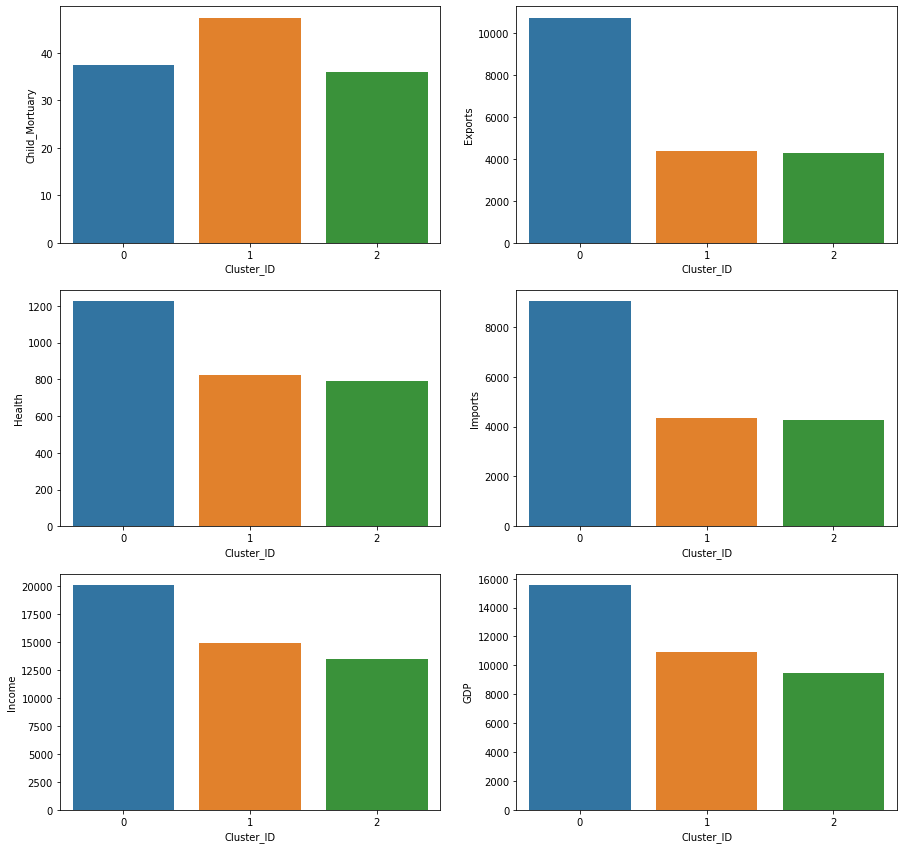

In [110]:
plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
sns.barplot(x="Cluster_ID", y="Child_Mortuary", data=country_total)
plt.subplot(4,2,2)
sns.barplot(x="Cluster_ID", y="Exports", data=country_total)
plt.subplot(4,2,3)
sns.barplot(x="Cluster_ID", y="Health", data=country_total)
plt.subplot(4,2,4)
sns.barplot(x="Cluster_ID", y="Imports", data=country_total)
plt.subplot(4,2,5)
sns.barplot(x="Cluster_ID", y="Income", data=country_total)
plt.subplot(4,2,6)
sns.barplot(x="Cluster_ID", y="Inflation", data=country_total)
plt.subplot(4,2,6)
sns.barplot(x="Cluster_ID", y="Life_expectancy", data=country_total)
plt.subplot(4,2,6)
sns.barplot(x="Cluster_ID", y="GDP", data=country_total)
plt.show()

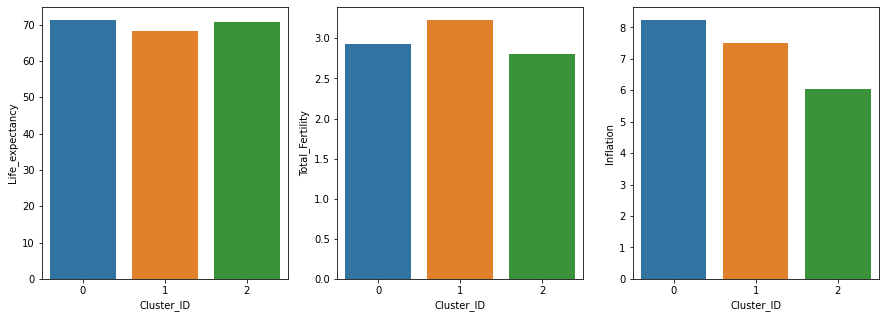

In [111]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.barplot(x="Cluster_ID", y="Life_expectancy", data=country_total)
plt.subplot(1,3,2)
sns.barplot(x="Cluster_ID", y="Total_Fertility", data=country_total)
plt.subplot(1,3,3)
sns.barplot(x="Cluster_ID", y="Inflation", data=country_total)
plt.show()

#### From the above plots we can say that the cluster 2 has low in Inflation, GDP, Income, Health, Exports, Imports which means that cluster is of our concern in economy.

#### The cluster 1 has high in Child_Mortuary, Total_Fertility and almost equal in Life_Expectancy.

#### And cluster 0 is significantly low in almost all categories.

In [164]:
cluster_data=total_country_data[total_country_data['Cluster_ID']==1]
cluster_data.sort_values(['Child_Mortuary','Exports','Health','Imports','Inflation','Life_expectancy','Total_Fertility','Income','GDP'], ascending=[False,True,False,False,True,True,False,True,True]).head(10)

,Country,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP,Cluster_ID,Cluster_Labels
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,1,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,1,1
28,Cameroon,108.0,290.820,67.2030,353.700,2660,1.91,57.3,5.11,1310,1,1
106,Mozambique,101.0,131.985,21.8299,193.578,918,7.64,54.5,5.56,419,1,1
116,Pakistan,92.1,140.400,22.8800,201.760,4280,10.90,65.3,3.85,1040,1,1
94,Malawi,90.5,104.652,30.2481,160.191,1030,12.10,53.1,5.31,459,1,1
150,Togo,90.3,196.176,37.3320,279.624,1210,1.18,58.7,4.87,488,1,1
56,Gambia,80.3,133.756,31.9778,239.974,1660,4.30,65.5,5.71,562,1,1
126,Rwanda,63.6,67.560,59.1150,168.900,1350,2.61,64.6,4.51,563,1,2
149,Timor-Leste,62.6,79.200,328.3200,1000.800,1850,26.50,71.1,6.23,3600,1,1


####  Lets go with Hierarchical Clustering process
### Hierarchical Clustering

In [113]:
country_data_scaled.head()

,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP
0,1.234847,-0.510090,-0.563608,-0.530152,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.396063,-0.391462,-0.321693,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.336697,-0.453862,-0.392076,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,-0.285794,-0.518900,-0.378423,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.064875,-0.035126,0.301255,0.295540,-0.620888,0.780774,-0.575585,0.180376


In [115]:
total_country_data.head()

,Country,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP,Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


#### Lets give the Linkage.

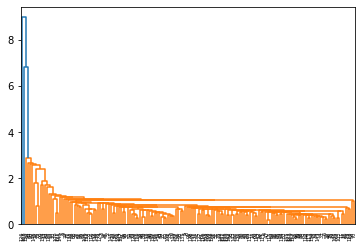

In [116]:
mergings = linkage(country_data_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### From the above plot we cannot find certain pattern. Lets go with complete linkage

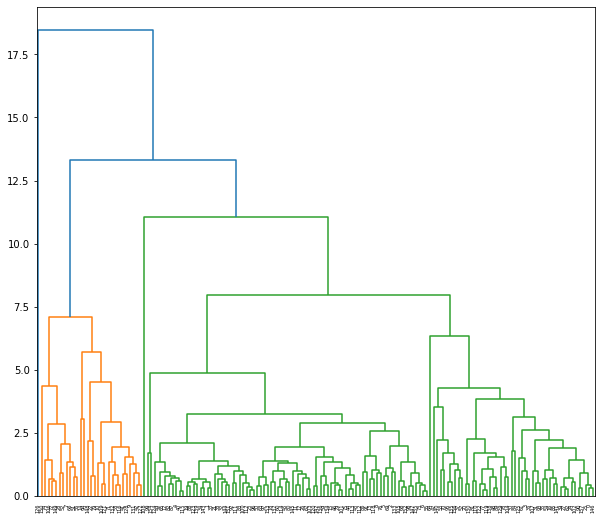

In [119]:
fig = plt.figure(figsize=(10,9))
mergings = linkage(country_data_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Lets cut the dendrogram such that we get number of clusters = 3.

In [120]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

In [122]:
final_dataset['Cluster_Labels'] = cluster_labels
final_dataset.head()

,PC1,PC2,PC3,PC4,Cluster_ID,Cluster_Labels
0,-2.725308,1.217684,-0.562977,0.222393,2,0
1,0.098118,-1.492681,0.069044,-0.396311,0,0
2,-0.323743,-0.711889,1.019643,-0.131494,0,0
3,-2.692059,2.048867,0.530635,0.418259,2,0
4,1.082888,-0.816007,-0.211526,-0.318528,0,0


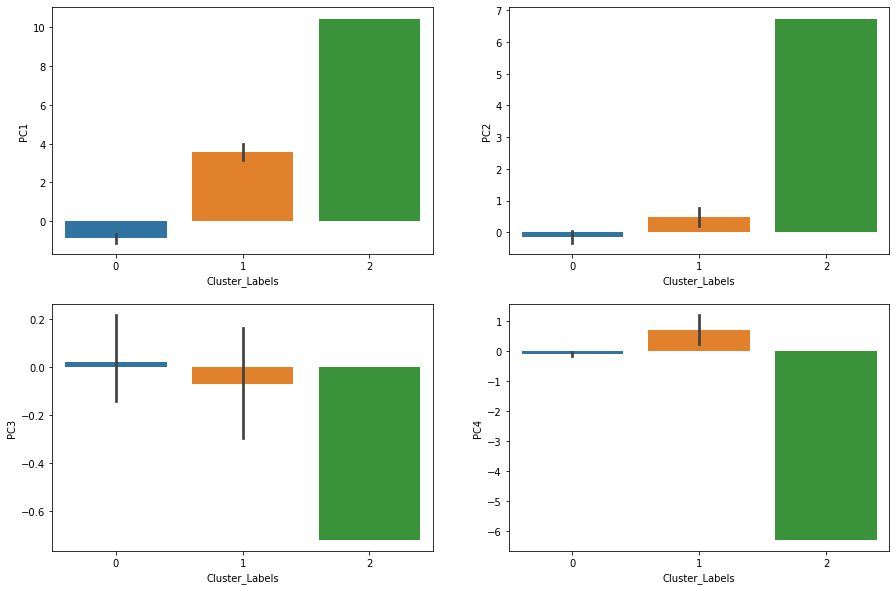

In [128]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.barplot(x="Cluster_Labels", y="PC1", data=final_dataset)
plt.subplot(2,2,2)
sns.barplot(x="Cluster_Labels", y="PC2", data=final_dataset)
plt.subplot(2,2,3)
sns.barplot(x="Cluster_Labels", y="PC3", data=final_dataset)
plt.subplot(2,2,4)
sns.barplot(x="Cluster_Labels", y="PC4", data=final_dataset)
plt.show()

#### Lets go with boxplot

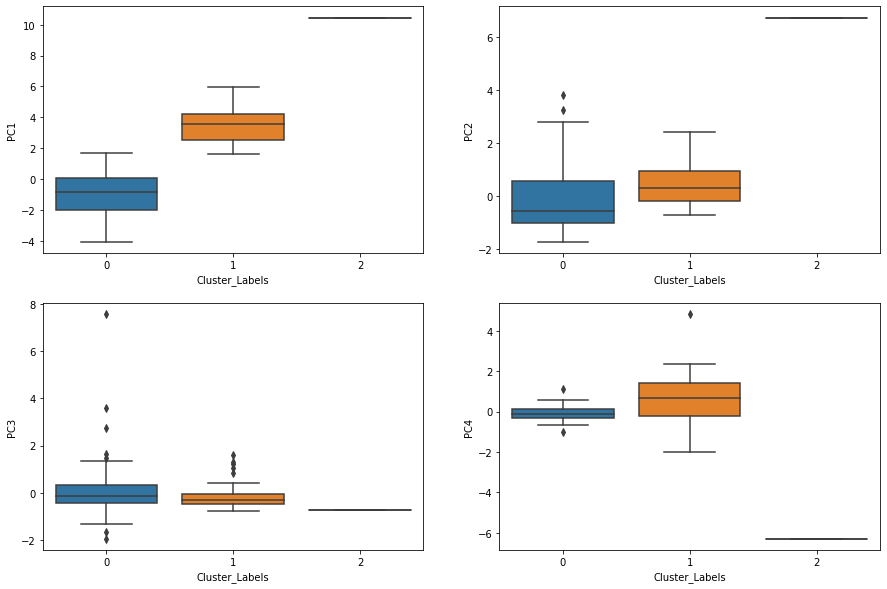

In [129]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.boxplot(x="Cluster_Labels", y="PC1", data=final_dataset)
plt.subplot(2,2,2)
sns.boxplot(x="Cluster_Labels", y="PC2", data=final_dataset)
plt.subplot(2,2,3)
sns.boxplot(x="Cluster_Labels", y="PC3", data=final_dataset)
plt.subplot(2,2,4)
sns.boxplot(x="Cluster_Labels", y="PC4", data=final_dataset)
plt.show()

#### Lets check the distances

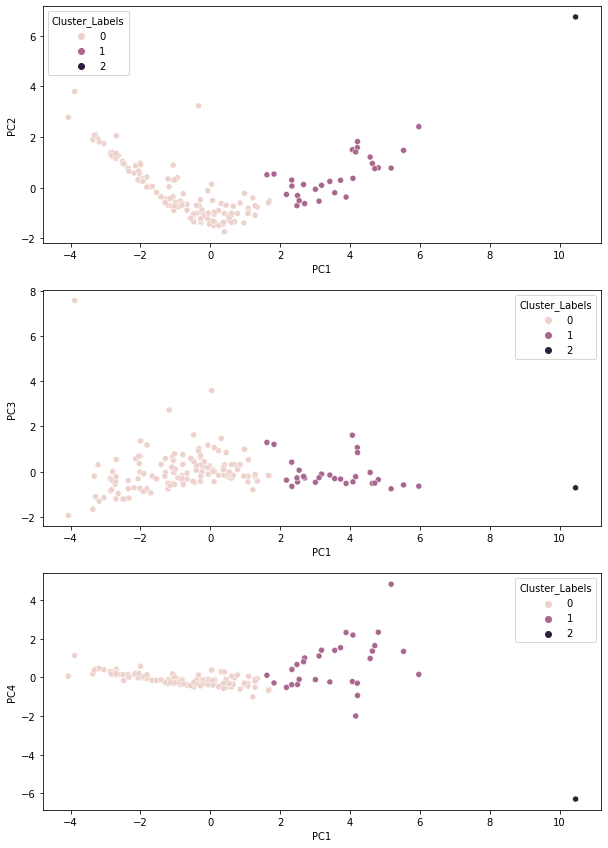

In [130]:
plt.figure(figsize=(10, 20))
plt.subplot(4,1,1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster_Labels", data=final_dataset)
plt.subplot(4,1,2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster_Labels", data=final_dataset)
plt.subplot(4,1,3)
sns.scatterplot(x="PC1", y="PC4", hue="Cluster_Labels", data=final_dataset)
plt.show()

#### There is intra cluster Homogenity

#### Now similarly follwoing the above steps.

In [136]:
cluster_label_h = final_dataset.pop('Cluster_Labels')
cluster_label_h

0      0
1      0
2      0
3      0
4      0
      ..
153    0
154    0
155    0
156    0
157    0
Name: Cluster_Labels, Length: 158, dtype: int32

In [147]:
total_country_data = total_country_data.join(cluster_label_h)
total_country_data.head()

,Country,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP,Cluster_ID,Cluster_Labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [141]:
total_country_data['Cluster_Labels'].value_counts()

0    128
1     29
2      1
Name: Cluster_Labels, dtype: int64

In [142]:
child_mort_mean_h = pd.DataFrame(total_country_data.groupby(["Cluster_Labels"]).Child_Mortuary.mean())
exports_mean_h= pd.DataFrame(total_country_data.groupby(["Cluster_Labels"]).Exports.mean())
health_mean_h = pd.DataFrame(total_country_data.groupby(["Cluster_Labels"]).Health.mean())
imports_mean_h = pd.DataFrame(total_country_data.groupby(["Cluster_Labels"]).Imports.mean())
income_mean_h = pd.DataFrame(total_country_data.groupby(["Cluster_Labels"]).Income.mean())
inflat_mean_h = pd.DataFrame(total_country_data.groupby(["Cluster_Labels"]).Inflation.mean())
life_expec_mean_h = pd.DataFrame(total_country_data.groupby(["Cluster_Labels"]).Life_expectancy.mean())
total_fer_mean_h = pd.DataFrame(total_country_data.groupby(["Cluster_Labels"]).Total_Fertility.mean())
gdpp_mean_h = pd.DataFrame(total_country_data.groupby(["Cluster_Labels"]).GDP.mean())

country_total_h = pd.concat([pd.Series([0,1,2]),child_mort_mean_h,exports_mean_h,health_mean_h,imports_mean_h,income_mean_h,inflat_mean_h,life_expec_mean_h,total_fer_mean_h,gdpp_mean_h], axis=1)
country_total_h.columns = ['Cluster_ID', 'Child_Mortuary','Exports','Health','Imports','Income','Inflation','Life_expectancy','Total_Fertility','GDP']
country_total_h.head()

,Cluster_ID,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP
0,0,37.047656,8470.017085,1077.731016,7373.994594,17836.757812,7.425000,71.020312,2.903359,13472.968750
1,1,45.413793,4391.969676,824.694517,4388.851862,15174.758621,7.728828,68.703448,3.100345,10992.448276
2,2,63.600000,67.560000,59.115000,168.900000,1350.000000,2.610000,64.600000,4.510000,563.000000


#### Lets plot the barplots

<ipython-input-144-909c8434cd6c>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,2,6)
<ipython-input-144-909c8434cd6c>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,2,6)


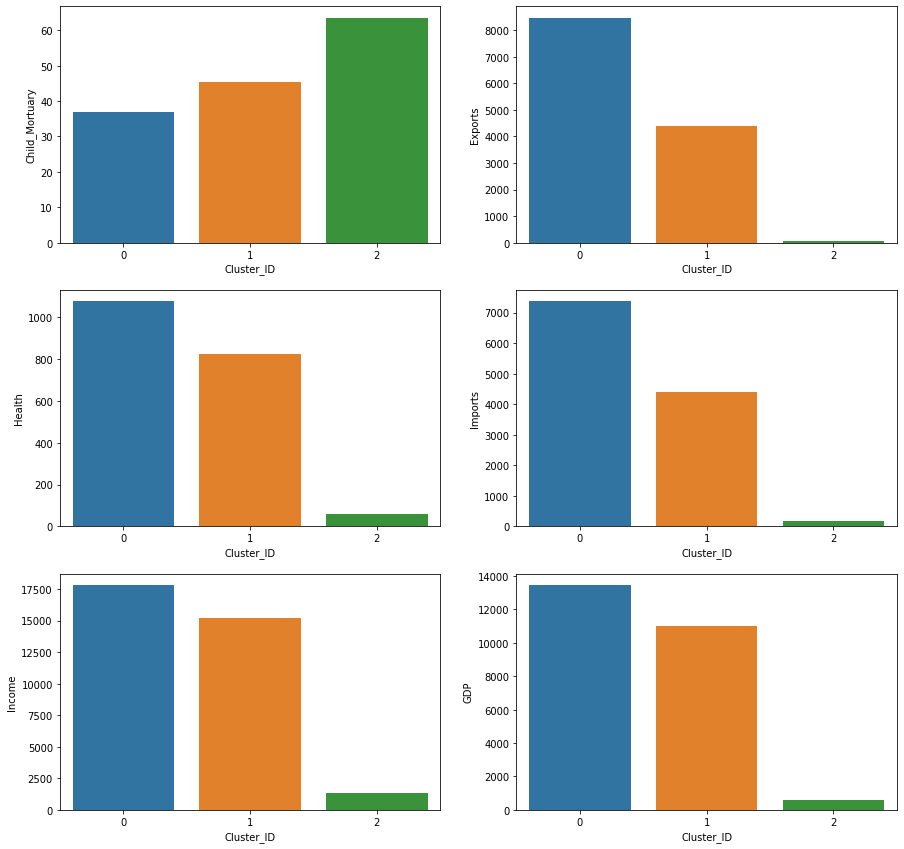

In [144]:
plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
sns.barplot(x="Cluster_ID", y="Child_Mortuary", data=country_total_h)
plt.subplot(4,2,2)
sns.barplot(x="Cluster_ID", y="Exports", data=country_total_h)
plt.subplot(4,2,3)
sns.barplot(x="Cluster_ID", y="Health", data=country_total_h)
plt.subplot(4,2,4)
sns.barplot(x="Cluster_ID", y="Imports", data=country_total_h)
plt.subplot(4,2,5)
sns.barplot(x="Cluster_ID", y="Income", data=country_total_h)
plt.subplot(4,2,6)
sns.barplot(x="Cluster_ID", y="Inflation", data=country_total_h)
plt.subplot(4,2,6)
sns.barplot(x="Cluster_ID", y="Life_expectancy", data=country_total_h)
plt.subplot(4,2,6)
sns.barplot(x="Cluster_ID", y="GDP", data=country_total_h)
plt.show()

#### In case of economy the cluster 0 have high rate compared to remaining clusters.
#### Lets ignore cluster 2 as t has only one country lets focus on cluster 1

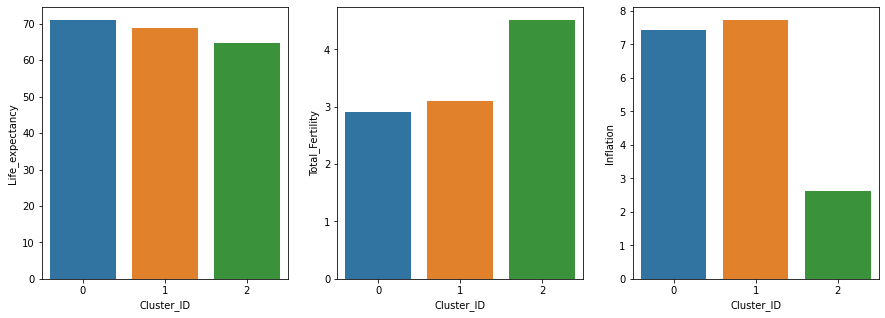

In [145]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.barplot(x="Cluster_ID", y="Life_expectancy", data=country_total_h)
plt.subplot(1,3,2)
sns.barplot(x="Cluster_ID", y="Total_Fertility", data=country_total_h)
plt.subplot(1,3,3)
sns.barplot(x="Cluster_ID", y="Inflation", data=country_total_h)
plt.show()

#### Lets focus on cluster 2 as it is high in Child_Moternity and low in all economic components.

In [162]:
cluster_data_hc=total_country_data[total_country_data['Cluster_Labels']==1]
cluster_data_hc.sort_values(['Child_Mortuary','Exports','Health','Imports','Inflation','Life_expectancy','Total_Fertility','Income','GDP'], ascending=[False,True,False,False,True,True,False,True,True]).head(10)

,Country,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP,Cluster_ID,Cluster_Labels
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.45,32.1,3.33,662,1,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,1,1
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.91,57.3,5.11,1310,1,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,1,1
116,Pakistan,92.1,140.4000,22.8800,201.760,4280,10.90,65.3,3.85,1040,1,1
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,1,1
150,Togo,90.3,196.1760,37.3320,279.624,1210,1.18,58.7,4.87,488,1,1
56,Gambia,80.3,133.7560,31.9778,239.974,1660,4.30,65.5,5.71,562,1,1
149,Timor-Leste,62.6,79.2000,328.3200,1000.800,1850,26.50,71.1,6.23,3600,1,1
109,Nepal,47.0,56.7136,31.0800,215.488,1990,15.10,68.3,2.61,592,0,1


In [163]:
cluster_data=total_country_data[total_country_data['Cluster_ID']==1]
cluster_data.sort_values(['Child_Mortuary','Exports','Health','Imports','Inflation','Life_expectancy','Total_Fertility','Income','GDP'], ascending=[False,True,False,False,True,True,False,True,True]).head(10)

,Country,Child_Mortuary,Exports,Health,Imports,Income,Inflation,Life_expectancy,Total_Fertility,GDP,Cluster_ID,Cluster_Labels
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,1,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,1,1
28,Cameroon,108.0,290.820,67.2030,353.700,2660,1.91,57.3,5.11,1310,1,1
106,Mozambique,101.0,131.985,21.8299,193.578,918,7.64,54.5,5.56,419,1,1
116,Pakistan,92.1,140.400,22.8800,201.760,4280,10.90,65.3,3.85,1040,1,1
94,Malawi,90.5,104.652,30.2481,160.191,1030,12.10,53.1,5.31,459,1,1
150,Togo,90.3,196.176,37.3320,279.624,1210,1.18,58.7,4.87,488,1,1
56,Gambia,80.3,133.756,31.9778,239.974,1660,4.30,65.5,5.71,562,1,1
126,Rwanda,63.6,67.560,59.1150,168.900,1350,2.61,64.6,4.51,563,1,2
149,Timor-Leste,62.6,79.200,328.3200,1000.800,1850,26.50,71.1,6.23,3600,1,1


#### The above two are the countries obtained by K-Means and Hierarchial clustering.